# EDA Structuring: Lightning Data Analysis with Python

## Introduction
## Objectives
Throughout the analysis, we will perform the following tasks:
- Identify the locations with the highest number of lightning strikes in a single day.
- Determine which locations experienced the greatest number of days with at least one lightning strike.
- Examine whether certain days of the week show differences in lightning activity.
- Explore how lightning strikes are distributed across months and calculate monthly proportions.

## Initial Hypotheses
Before starting, we propose the following initial hypotheses:
1. Locations with the highest number of lightning strikes may have specific geographic or climatic factors.
2. Certain days of the week may show more lightning activity than others due to weather patterns.
3. There may be significant differences in lightning activity between months of the year, possibly related to specific seasons.

## Approach
With these hypotheses in mind, we will structure and visualize the data to gain a better understanding of the underlying patterns in lightning activity.

## Overview

In this notebook, I will examine lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. To complete this notebook, we will:

* Find the locations with the greatest number of strikes within a single day
* Examine the locations that had the greatest number of days with at least one lightning strike 
* Determine whether certain days of the week had more lightning strikes than others  
* Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
* Plot this data on a bar graph

## Import packages and libraries

Before getting started, like we know, we will need to import all the required libraries and extensions. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

### Organize the data

In [2]:
# Read in the 2018 data.
df = pd.read_csv('eda_structuring_with_python_dataset1.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Just like the previous dataset, this one also has three columns: date, number_of_strikes, and center_point_geom. The first step is to ensure that the date column is in datetime format, as this will make any date-based analysis or manipulation much easier

In [4]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date']) 

Now, let's check the shape of the dataframe. 

In [60]:
df.shape

(3401012, 3)

Check for duplicates. If the shape of the data is different after running this code, you will know there were duplicate rows.

In [61]:
df.drop_duplicates().shape

(3401012, 3)

The shape of the dataset after dropping duplicates is the same, so you can assume there are no duplicates. Hence, there is at most one row per date, per area, and per number of strikes. 

### Locations with most strikes in a single day

To identify the locations with the most strikes in a single day, we will sort the `number_of_strikes` column in descending value, or by most to least strikes.

In [62]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


### Locations with most days with at least one lightning strike


To determine how many days a specific geographic location experienced at least one lightning strike, we will use the value_counts() function on the center_point_geom column. The logic is simple: if each row represents a location-day, counting how many times each location appears in the data will give us the number of days that location recorded lightning strikes.

In [70]:
# Identify the locations that appear most in the dataset.
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: count, Length: 170855, dtype: int64

The locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. These locations are all rather close to each other geographically. Notice also that the `value_counts()` function automatically sorts the results in descending order. 

Now we will examine whether there is an even distribution of values, or whether 108 strikes is an unusually high number of days with lightning strikes. We will use the `value_counts()` function again, but this time we will output the top 20 results. We will also rename the columns and apply a color gradient.

In [71]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


###  Lightning strikes by day of week

Grouping Lightning Strikes by Day of the Week

One useful grouping is categorizing lightning strikes by the day of the week. This will allow us to see if certain days experienced more or fewer strikes than others. To calculate this, we’ll use the datetime format of the date column, which makes it easy to extract date-related information and create new columns.

First, we’ll create a column called week using dt.isocalendar() on the date column. This function generates three pieces of information: the year, the week number, and the day of the week. For example, January 3, 1950, would be represented as year 1950, week 1, day 3. Since we only need the week number, we’ll use the week column.

Next, we’ll add a weekday column using dt.day_name(). This will extract the name of the day (e.g., “Monday” or “Tuesday”) for each date.

In [72]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We will use the `groupby()` function to do this.

In [66]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot. 

We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

In [67]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we will code the plot. Remember that `showfliers` is the parameter that controls whether or not outliers are displayed in the plot. If we input `True`, outliers are included; if we input `False`, outliers are left off of the box plot. Keep in mind, we aren’t *deleting* any outliers from the dataset when we create this chart—we are only excluding them from the visualization.

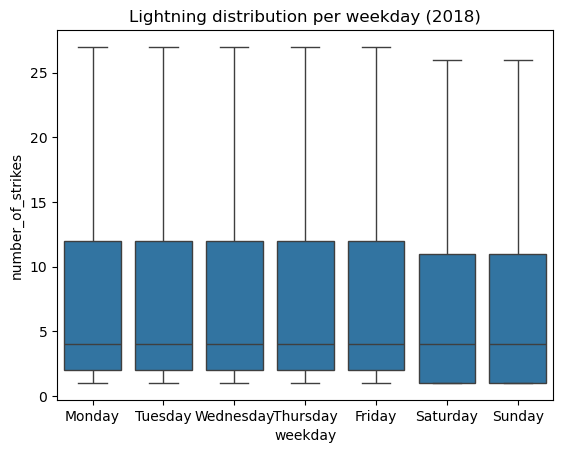

In [76]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

Notice that the median remains the same across all days of the week. However, on Saturdays and Sundays, the distributions are lower compared to the rest of the week. Additionally, the average number of lightning strikes on Saturdays and Sundays is lower than on weekdays. Why might this be? One possible explanation is that aerosol particles emitted by factories and vehicles may increase the likelihood of lightning strikes. In the U.S., Saturdays and Sundays are days when many people do not work, meaning fewer factories are operating and fewer cars are on the road. This is just a hypothesis, but it could be an interesting direction for further research.

### Monthly lightning strikes 2016–2018

Finally, we will analyze monthly lightning strike data from 2016 to 2018. We will calculate the percentage of total lightning strikes for each year that occurred in a specific month. Then, we will visualize this data using a bar graph.

In [77]:
# Import 2016–2017 data
df_2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


The data is in the same format as the 2018 data when we imported it previously. Now, we will convert the `date` column to datetime.

In [78]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

Now we can combine the 2016–2017 dataframe with the 2018 dataframe. There are several functions that can do this. We will use `concat()`. Remember that the 2018 data has two added columns: `week` and `weekday`. To simplify the results of our combined dataframe, we will drop these added columns during the concatenation. Note that the following code doesn't permanently modify `df`. The columns drop only for this operation. You can learn more about the `concat()` function in the [pandas.concat documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [79]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


To properly label the bars in the bar plot, we will create three new columns containing the year, the month number, and the month name.

In [82]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Let’s analyze the total number of lightning strikes recorded for each year.

In [83]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


Now we will calculate the percentage of total lightning strikes that occurred in a given month for each year and assign the results to a new dataframe called `lightning_by_month`. 

In [84]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

/var/folders/rt/70skz_t1213grg0yzn775mwc0000gn/T/ipykernel_5183/4141918718.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


We can use the `agg()` function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.

In [85]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

/var/folders/rt/70skz_t1213grg0yzn775mwc0000gn/T/ipykernel_5183/1371192814.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In our bar plot, we need to use the monthly totals to calculate percentages. For each month, we need the total number of strikes recorded that month and the total number of strikes recorded for the corresponding year. We will create a new DataFrame called percentage_lightning that includes a new column named year_strikes, representing the total strikes for each year. To achieve this, we will use the merge() function. We will combine the lightning_by_month and lightning_by_year DataFrames, specifying that the merge should be based on the year column. This means that wherever the year columns have the same value in both DataFrames, a row will be created in the new DataFrame with all other columns merged


In [88]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,1524339,44600989
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


Now we will create a new column in our DataFrame that represents the percentage of total lightning strikes recorded during each month for each year. To do this, we will divide the number_of_strikes column by the year_strikes column and multiply the result by 100.

In [90]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,1524339,44600989,3.417725
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


Now we can plot the percentages by month in a bar graph.

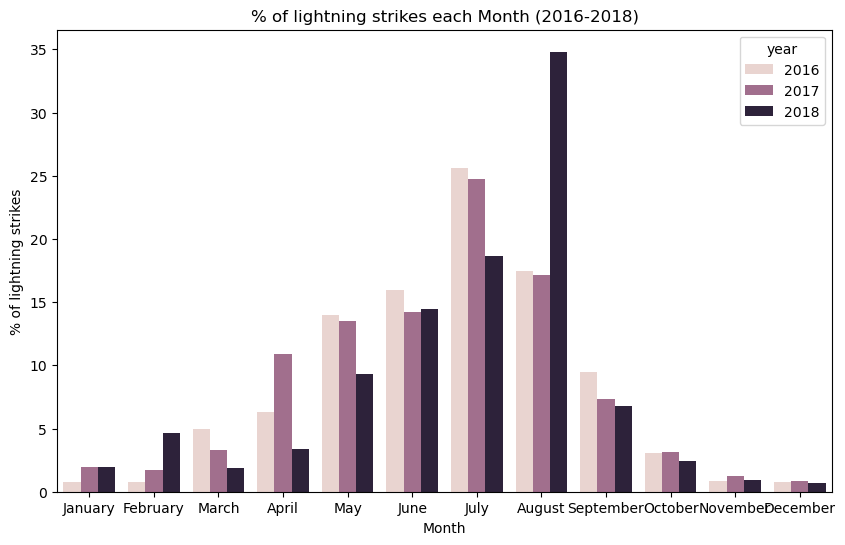

In [92]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

For all three years, there is a clear pattern over the course of each year. One month stands out: August. More than one third of the lightning strikes in 2018 happened in August. 

## Project Conclusion

In this project, we analyzed lightning strike data collected by NOAA from 2016 to 2018, leveraging Python to structure, explore, and visualize the information. Our key findings include:
	1.	Locations with the most strikes: The location POINT(-92.5 35.5) recorded the highest number of lightning strikes on a single day (2,211 strikes) on August 20, 2018. Several nearby locations exhibited similar patterns, highlighting August as a month with high lightning activity.
	2.	Frequency of lightning by location: Certain areas, such as POINT(-81.5 22.5), experienced lightning on up to 108 days in a single year, representing nearly one-third of the total days.
	3.	Weekly patterns: Weekends (Saturday and Sunday) recorded a lower average of lightning strikes compared to weekdays, possibly due to reduced human activity, such as emissions from factories and vehicles.
	4.	Monthly distribution: August stood out as the month with the highest lightning activity across all analyzed years, with over 33% of the strikes in 2018 occurring during this month. In contrast, months like January and December exhibited significantly lower activity levels.

Using exploratory data analysis (EDA) techniques such as grouping, calculating averages and percentages, and visualizing data with bar graphs and boxplots, we identified clear spatial and temporal patterns in lightning activity. This analysis provides a solid foundation for future research on the climatic and human factors influencing lightning strikes.

Impact: This project demonstrates how to structure and analyze data to extract valuable insights that can be applied to climate studies and spatial analyses. The skills used here can be replicated to explore other datasets.data in Python and should be able to start applying this skill to your own datasets.